In [1]:
import keras
from keras import layers

encoding_dim = 32
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu',)(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)

#model maps an input to reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
#model maps an input to encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 17s 13ms/step - loss: 0.3861 - val_loss: 0.1931
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1815 - val_loss: 0.1509
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1472 - val_loss: 0.1327
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1308 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1198 - val_loss: 0.1122
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1119 - val_loss: 0.1061
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1061 - val_loss: 0.1018
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1024 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0996 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0976 - val_l

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


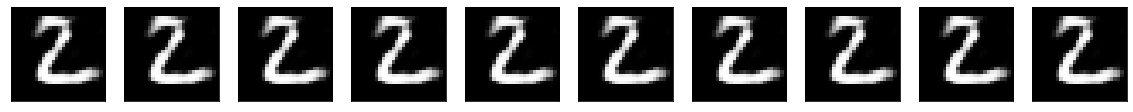

In [9]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[1].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1)
  plt.imshow(decoded_imgs[1].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [10]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [11]:
#Deep Autoencoder using a stack of layers as an encoder
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [12]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 5s 19ms/step - loss: 0.3398 - val_loss: 0.1661
Epoch 2/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1564 - val_loss: 0.1378
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1364 - val_loss: 0.1274
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1266 - val_loss: 0.1190
Epoch 5/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1189 - val_loss: 0.1136
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1140 - val_loss: 0.1105
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1106 - val_loss: 0.1067
Epoch 8/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1077 - val_loss: 0.1042
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1049 - val_loss: 0.1023
Epoch 10/100
235/235 [==============================] - 4s 17ms/step - loss: 0.103

In [2]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [3]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape, x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [4]:
#Generate noisy images
#noise_factor = 0.5
#x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
#x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

#x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
#x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)



In [5]:
#tensorboard --logdir=/tmp/autoencoder

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 88s 160ms/step - loss: 0.3378 - val_loss: 0.1565
Epoch 2/50
469/469 [==============================] - 75s 160ms/step - loss: 0.1501 - val_loss: 0.1319
Epoch 3/50
469/469 [==============================] - 76s 162ms/step - loss: 0.1308 - val_loss: 0.1223
Epoch 4/50
469/469 [==============================] - 75s 161ms/step - loss: 0.1226 - val_loss: 0.1167
Epoch 5/50
469/469 [==============================] - 75s 159ms/step - loss: 0.1172 - val_loss: 0.1130
Epoch 6/50
469/469 [==============================] - 75s 159ms/step - loss: 0.1136 - val_loss: 0.1106
Epoch 7/50
469/469 [==============================] - 77s 165ms/step - loss: 0.1112 - val_loss: 0.1090
Epoch 8/50
469/469 [==============================] - 77s 163ms/step - loss: 0.1096 - val_loss: 0.1072
Epoch 9/50
361/469 [======================>.......] - ETA: 16s - loss: 0.1084

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Image Denoising with Convolutional Autoencoder
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])